# EDA - Exploratory Data Analysis   
- Distribution of the target variable (days_in_shelter)
- Exploring and visualizing the other features distributions
- Computing the correlation between target variable and the other variables

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [3]:
from From_Shelter_to_Love.data_provisoria import get_data

In [4]:
#Getting the data

df = get_data()
df.head(2)

,Animal ID,Intake Type,Intake Condition,Animal Type,Breed,Outcome Type,days_in_shelter,age_upon_intake_months,age_upon_intake_years,age_upon_outcome_months,age_upon_outcome_years,neutered_or_spayed_outcome,male_or_female_outcome,neutered_or_spayed_intake,male_or_female_intake,group_color
0,A006100,Public Assist,Normal,Dog,Mixed,Return to Owner,2.0,72.0,6.0,72.0,6.0,1,1.0,1,1.0,Yellow
1,A047759,Owner Surrender,Normal,Dog,Dachshund,Transfer,5.0,120.0,10.0,120.0,10.0,1,1.0,1,1.0,Tricolor


In [5]:
df.drop(columns = ['Animal ID','age_upon_outcome_years','age_upon_intake_years'], inplace = True)

## Exploring target variable (days_in_shelter)   
- Compute simple statistics for the target variable (min, max, mean, std, etc)
- Plot distributions

In [6]:
df.days_in_shelter.describe()

count    102725.000000
mean         19.717089
std          42.652623
min           1.000000
25%           3.000000
50%           6.000000
75%          18.000000
max        1522.000000
Name: days_in_shelter, dtype: float64

In [7]:
(df.isnull().sum().sort_values(ascending=False) / len(df)) * 100

male_or_female_outcome        4.066196
male_or_female_intake         4.066196
age_upon_intake_months        0.002920
age_upon_outcome_months       0.002920
Intake Type                   0.000000
Intake Condition              0.000000
Animal Type                   0.000000
Breed                         0.000000
Outcome Type                  0.000000
days_in_shelter               0.000000
neutered_or_spayed_outcome    0.000000
neutered_or_spayed_intake     0.000000
group_color                   0.000000
dtype: float64

In [8]:
df[(df.male_or_female_outcome != 1) | (df.male_or_female_outcome != 0)]

,Intake Type,Intake Condition,Animal Type,Breed,Outcome Type,days_in_shelter,age_upon_intake_months,age_upon_outcome_months,neutered_or_spayed_outcome,male_or_female_outcome,neutered_or_spayed_intake,male_or_female_intake,group_color
0,Public Assist,Normal,Dog,Mixed,Return to Owner,2.0,72.0,72.0,1,1.0,1,1.0,Yellow
1,Owner Surrender,Normal,Dog,Dachshund,Transfer,5.0,120.0,120.0,1,1.0,1,1.0,Tricolor
2,Public Assist,Injured,Dog,Shetland Sheepdog,Return to Owner,1.0,192.0,192.0,1,1.0,1,1.0,Brown
3,Stray,Aged,Dog,Mixed,Return to Owner,1.0,180.0,180.0,1,0.0,1,0.0,Black
4,Stray,Normal,Dog,Mixed,Return to Owner,1.0,180.0,180.0,0,0.0,0,0.0,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110852,Stray,Normal,Dog,Mixed,Return to Owner,2.0,24.0,24.0,0,1.0,0,1.0,Black
110853,Stray,Normal,Dog,Mixed,Return to Owner,2.0,24.0,24.0,1,0.0,1,0.0,White
110861,Stray,Normal,Dog,Mixed,Return to Owner,1.0,24.0,24.0,1,1.0,1,1.0,Brown
110874,Owner Surrender,Normal,Dog,Alaskan Husky,Rto-Adopt,2.0,12.0,12.0,1,1.0,0,1.0,Black


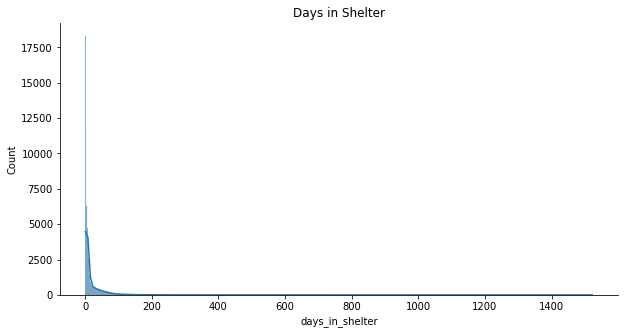

In [9]:
def plot_dist(series=df["days_in_shelter"], title="Days in Shelter"):
    fig, axs = plt.subplots(figsize = [10,5])
    sns.histplot(series, kde=True, discrete=True, ax = axs)
    sns.despine()
    plt.title(title);
    plt.show()
plot_dist()

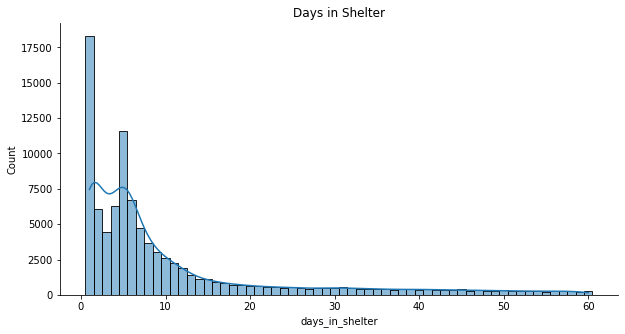

In [10]:
# drop absurd values 
plot_dist(df[df.days_in_shelter.between(0, 60)]['days_in_shelter'])

In [11]:
df[df.days_in_shelter > 10].shape

(35220, 13)

In [12]:
#Let's visualize our target in bins

def bins(df, column):
    bins = []
    for row in df[column]:
        if row in range(0,16):
            bins.append('[0,15]')
        elif row in range(16,31):
            bins.append('[16,30]')
        elif row in range(31,61):
            bins.append('[31,60]')
        else:
            bins.append('[+60]')
    return bins

df['day_bins'] = bins(df,'days_in_shelter')

In [13]:
df.head(2)

,Intake Type,Intake Condition,Animal Type,Breed,Outcome Type,days_in_shelter,age_upon_intake_months,age_upon_outcome_months,neutered_or_spayed_outcome,male_or_female_outcome,neutered_or_spayed_intake,male_or_female_intake,group_color,day_bins
0,Public Assist,Normal,Dog,Mixed,Return to Owner,2.0,72.0,72.0,1,1.0,1,1.0,Yellow,"[0,15]"
1,Owner Surrender,Normal,Dog,Dachshund,Transfer,5.0,120.0,120.0,1,1.0,1,1.0,Tricolor,"[0,15]"


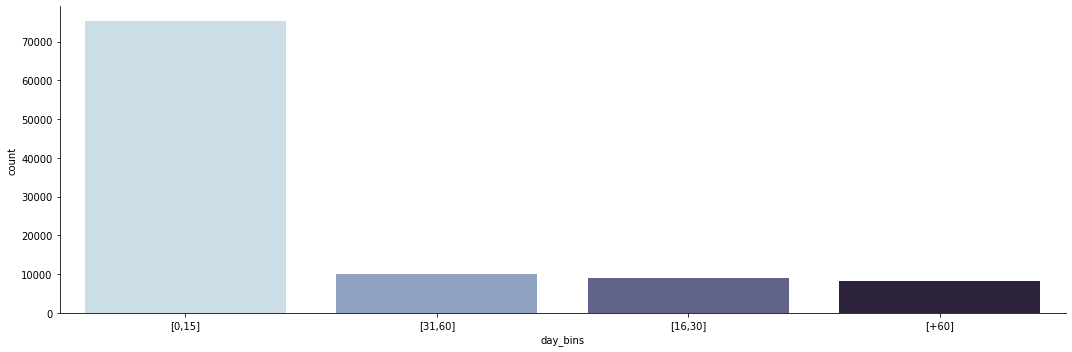

In [14]:
sns.catplot(x="day_bins", kind="count", palette = "ch:s=.25,rot=-.25", data=df, height=5, aspect=3);
plt.show()

## Exploring other features   
Exploring categorical features and numerical features and how they relate with target

### Categorical features   
Categorical features in dataset:   
- Intake Type
- Intake Condition
- Animal Type
- Breed (too many breed, how to plot them visually?)
- Outcome Type
- Colors (too many colors, how to plot them visually?)   
- neutered_or_spayed_intake
- male_or_female_intake
- neutered_or_spayed_intake
- male_or_female_outcome
- neutered_or_spayed_outcome
   
(Missing some features (work in get_data))

#### Intake Type

In [146]:
df['Intake Type'].describe()

count     102725
unique         5
top        Stray
freq       79318
Name: Intake Type, dtype: object

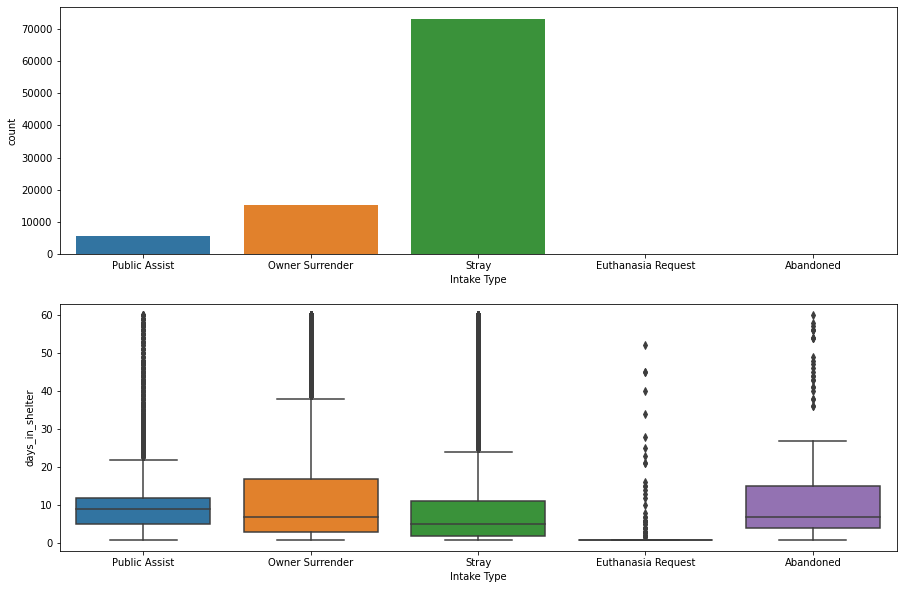

In [147]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.countplot(x="Intake Type", data=df[df.days_in_shelter.between(0,60)], ax = axs[0]);

sns.boxplot(x="Intake Type", y = 'days_in_shelter', data=df[df.days_in_shelter.between(0,60)], ax = axs[1]);

#### Intake Condition

In [148]:
df['Intake Condition'].describe()

count     102725
unique        10
top       Normal
freq       90036
Name: Intake Condition, dtype: object

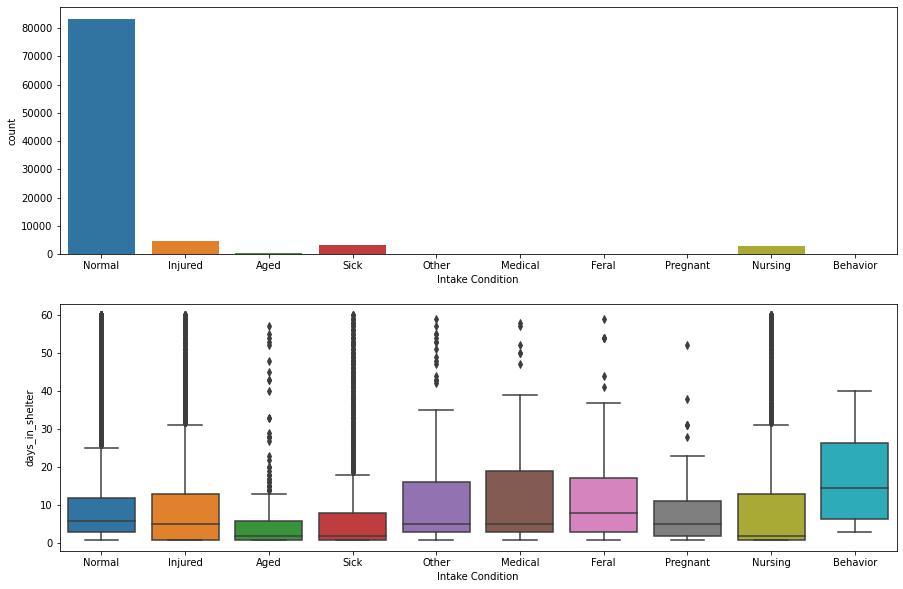

In [149]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.countplot(x="Intake Condition", data=df[df.days_in_shelter.between(0,60)], ax = axs[0]);

sns.boxplot(x="Intake Condition", y = 'days_in_shelter', data=df[df.days_in_shelter.between(0,60)], ax = axs[1]);

#### Animal Type

In [150]:
df['Animal Type'].describe()

count     102725
unique         2
top          Dog
freq       58881
Name: Animal Type, dtype: object

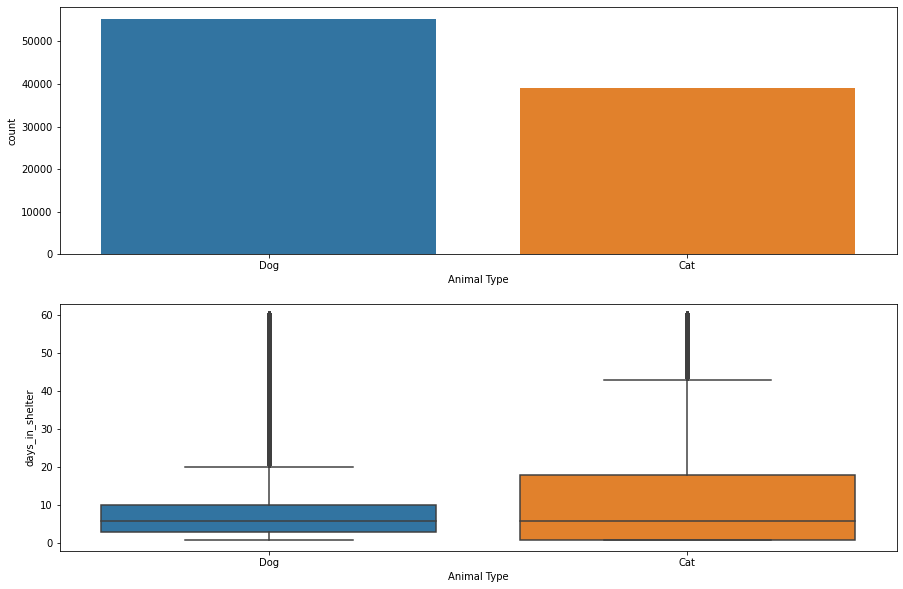

In [151]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.countplot(x="Animal Type", data=df[df.days_in_shelter.between(0,60)], ax = axs[0]);

sns.boxplot(x="Animal Type", y = 'days_in_shelter', data=df[df.days_in_shelter.between(0,60)], ax = axs[1]);

#### Breed

In [18]:
df.Breed.unique()

array(['Mixed', 'Dachshund', 'Shetland Sheepdog', 'Chihuahua Shorthair',
       'Pug', 'Queensland Heeler', 'Border Collie', 'Siamese',
       'Rat Terrier', 'Labrador Retriever', 'Pit Bull',
       'Bernese Mountain Dog', 'Greyhound', 'German Shepherd',
       'Lhasa Apso', 'Boston Terrier', 'German Shorthair Pointer',
       'American Eskimo', 'Jack Russell Terrier', 'Miniature Schnauzer',
       'Miniature Pinscher', 'Shih Tzu', 'Pekingese',
       'Australian Cattle Dog', 'Cairn Terrier', 'Cocker Spaniel',
       'Rottweiler', 'Rhod Ridgeback', 'Maltese', 'Miniature Poodle',
       'Siberian Husky', 'Basset Hound', 'Parson Russell Terrier',
       'Chinese Sharpei', 'Doberman Pinsch', 'Beagle',
       'Yorkshire Terrier', 'Tibetan Terrier', 'Basenji', 'Plott Hound',
       'American Staffordshire Terrier', 'Boxer',
       'Soft Coated Wheaten Terrier', 'Golden Retriever',
       'Norwich Terrier', 'St. Bernard Rough Coat', 'Akita', 'Vizsla',
       'Shiba Inu', 'Toy Poodle', 'Scott

In [152]:
#sns.catplot(x="Breed", y = 'days_in_shelter', kind="box", data=df[df.days_in_shelter.between(0,60)], height=5, aspect=3);

#### Outcome Type

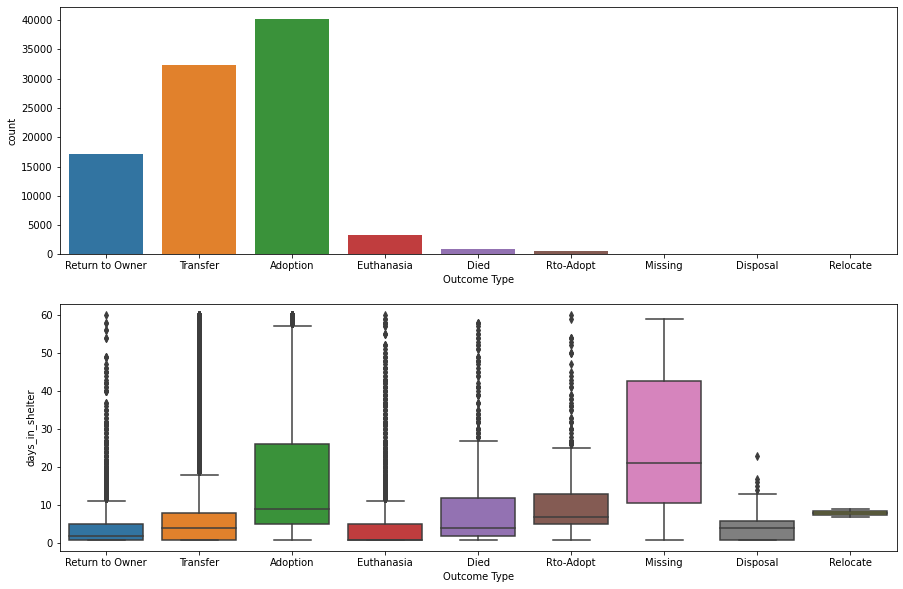

In [153]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.countplot(x="Outcome Type", data=df[df.days_in_shelter.between(0,60)], ax = axs[0]);

sns.boxplot(x="Outcome Type", y = 'days_in_shelter', data=df[df.days_in_shelter.between(0,60)], ax = axs[1]);

#### Colors

In [16]:
df.group_color.unique()

array(['Yellow', 'Tricolor', 'Brown', 'Black', 'White', 'Brown Tabby',
       'Tan', 'Gold', 'Tortie Point', 'Sable', 'Blue Merle', 'Gray',
       'Cream', 'Red', 'Gray Tabby', 'Brown Merle', 'Tortie',
       'Black Smoke', 'Calico', 'Orange Tabby', 'Blue Cream',
       'Lynx Point', 'Red Merle', 'Torbie', 'Blue', 'Lilac Point',
       'Black Brindle', 'Chocolate', 'Blue Point', 'Black Tabby',
       'Silver Tabby', 'Brown Brindle', 'Seal Point', 'Flame Point',
       'Blue Tick', 'Apricot', 'Blue Tabby', 'Buff', 'Chocolate Point',
       'Fawn', 'Silver', 'Cream Tabby', 'Calico Point', 'Red Tick',
       'Liver', 'Black Tiger', 'Orange', 'Blue Tiger', 'Yellow Brindle',
       'Brown Tiger', 'Blue Smoke', 'Ruddy', 'Liver Tick', 'Agouti',
       'Silver Lynx Point', 'Orange Tiger', 'Pink', 'Cream Tiger'],
      dtype=object)

In [1]:
#sns.catplot(x="group_color", y = 'days_in_shelter', kind="box", data=df[df.days_in_shelter.between(0,60)], height=5, aspect=3);

#### Neutered or not in Intake

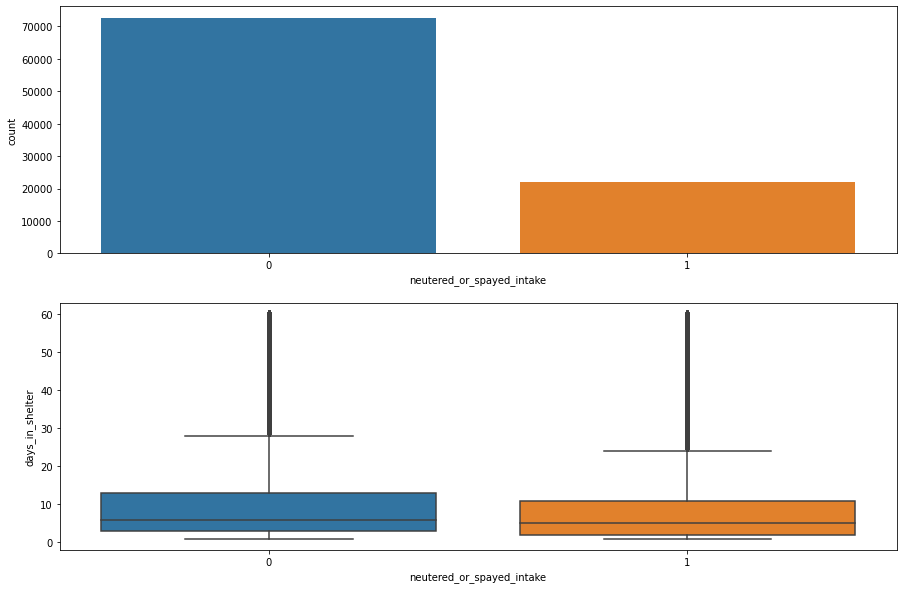

In [188]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.countplot(x="neutered_or_spayed_intake", data=df[df.days_in_shelter.between(0,60)], ax = axs[0]);

sns.boxplot(x="neutered_or_spayed_intake", y = 'days_in_shelter', data=df[df.days_in_shelter.between(0,60)], ax = axs[1]);

#### Neutered or not in Outcome

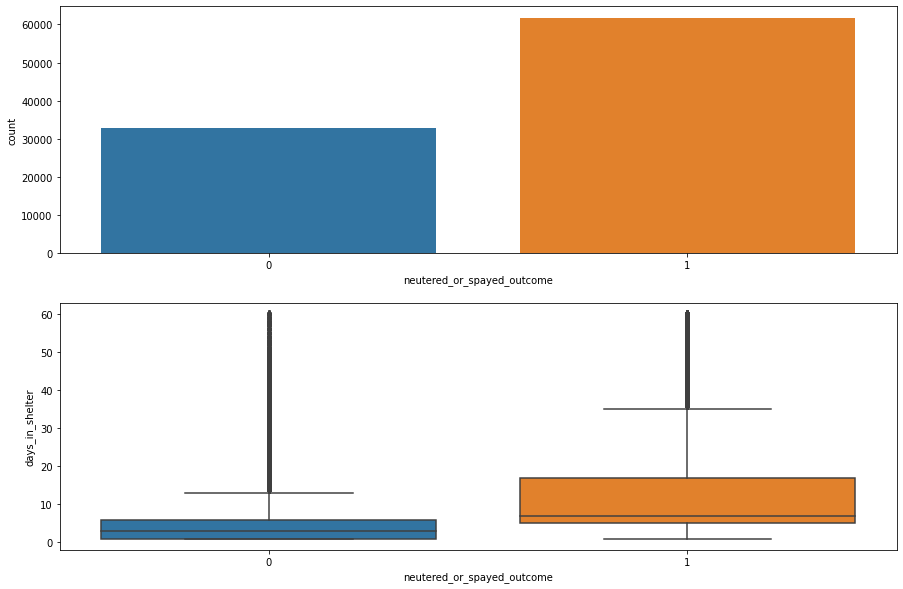

In [187]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.countplot(x="neutered_or_spayed_outcome", data=df[df.days_in_shelter.between(0,60)], ax = axs[0]);

sns.boxplot(x="neutered_or_spayed_outcome", y = 'days_in_shelter', data=df[df.days_in_shelter.between(0,60)], ax = axs[1]);

### Male or Female

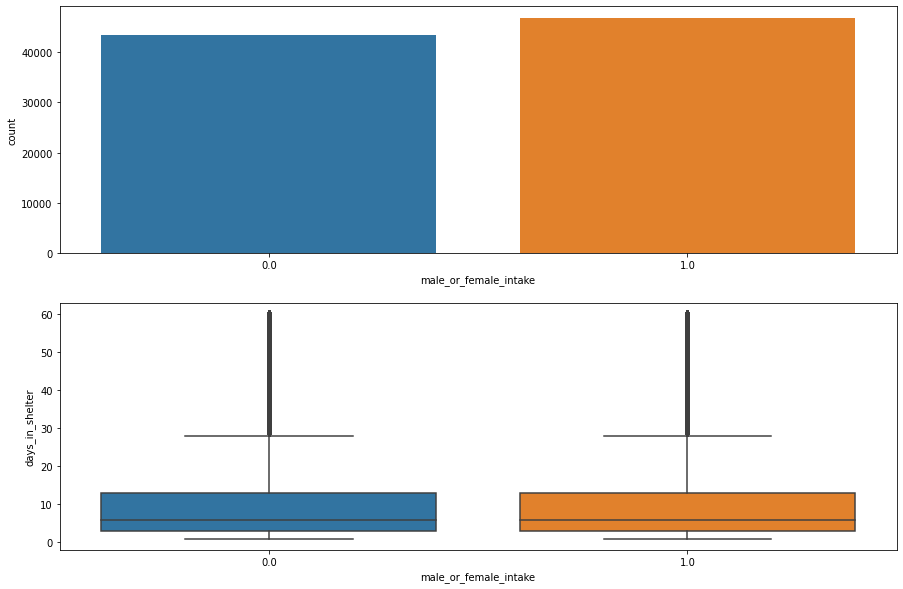

In [189]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.countplot(x="male_or_female_intake", data=df[df.days_in_shelter.between(0,60)], ax = axs[0]);

sns.boxplot(x="male_or_female_intake", y = 'days_in_shelter', data=df[df.days_in_shelter.between(0,60)], ax = axs[1]);

### Numerical features   
Categorical features in dataset:   
- Age Upon Intake Months
- Age upon Outcome Months

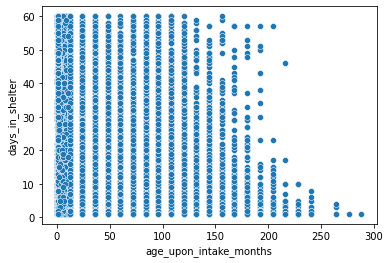

In [192]:
sns.scatterplot(x="age_upon_intake_months", y="days_in_shelter", data=df[df.days_in_shelter.between(0,60)])
plt.show()

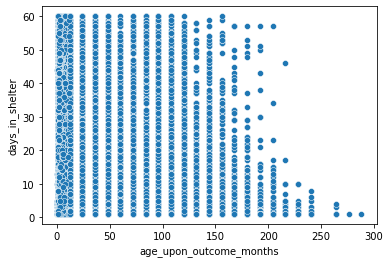

In [193]:
sns.scatterplot(x="age_upon_outcome_months", y="days_in_shelter", data=df[df.days_in_shelter.between(0,60)])
plt.show()

#### Encoding all categorical features   
Categorical features in dataset:   
- Intake Type
- Intake Condition
- Animal Type
- Breed (too many breed, how to plot them visually?)
- Outcome Type
- Colors (too many colors, how to plot them visually?)  

In [199]:
from sklearn.preprocessing import OneHotEncoder

In [163]:
df_cat = df.select_dtypes(include=['object']).copy()

In [164]:
df_cat.drop(columns = 'day_bins', inplace = True)

In [165]:
df_cat.columns

Index(['Intake Type', 'Intake Condition', 'Animal Type', 'Breed',
       'Outcome Type', 'group_color'],
      dtype='object')

In [157]:
df_ohe = df.select_dtypes(include=['float64','int64']).copy()

In [159]:
for column in df_cat.columns:
    ohe = OneHotEncoder(sparse = False)
    ohe.fit(df[[column]]) # Fit the encoder
    
    column_encoded = ohe.transform(df[[column]]) # Encode the feature
    
    for i in range(len(ohe.get_feature_names())):
        df_ohe[ohe.get_feature_names()[i]] = column_encoded.T[i]

/tmp/ipykernel_15512/3536123997.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ohe[ohe.get_feature_names()[i]] = column_encoded.T[i]
/tmp/ipykernel_15512/3536123997.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ohe[ohe.get_feature_names()[i]] = column_encoded.T[i]
/tmp/ipykernel_15512/3536123997.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

In [160]:
df_ohe

,days_in_shelter,age_upon_intake_months,age_upon_outcome_months,neutered_or_spayed_outcome,male_or_female_outcome,neutered_or_spayed_intake,male_or_female_intake,x0_Abandoned,x0_Euthanasia Request,x0_Owner Surrender,...,x0_Silver Lynx Point,x0_Silver Tabby,x0_Tan,x0_Torbie,x0_Tortie,x0_Tortie Point,x0_Tricolor,x0_White,x0_Yellow,x0_Yellow Brindle
0,2.0,72.0,72.0,1,1.0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5.0,120.0,120.0,1,1.0,1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,192.0,192.0,1,1.0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,180.0,180.0,1,0.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,180.0,180.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110852,2.0,24.0,24.0,0,1.0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110853,2.0,24.0,24.0,1,0.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
110861,1.0,24.0,24.0,1,1.0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110874,2.0,12.0,12.0,1,1.0,0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Correlation between numerical features and target

In [181]:
df_num = df.select_dtypes(include=['float64','int64']).copy()

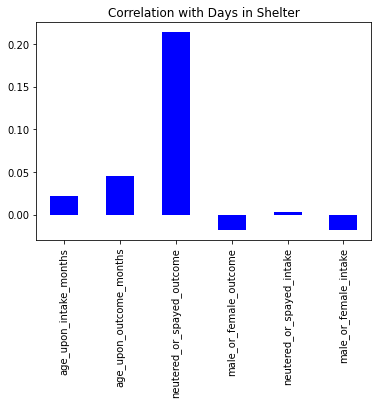

In [182]:
corrs = df_num.corr()
l = list(df_num)
l.remove('days_in_shelter')
corrs['days_in_shelter'][l].plot.bar(color = 'b');
plt.title('Correlation with Days in Shelter');


In [183]:
corrs[(corrs.days_in_shelter > 0.02) | (corrs.days_in_shelter < -0.02)]

,days_in_shelter,age_upon_intake_months,age_upon_outcome_months,neutered_or_spayed_outcome,male_or_female_outcome,neutered_or_spayed_intake,male_or_female_intake
days_in_shelter,1.000000,0.021341,0.045186,0.213529,-0.018016,0.003054,-0.018016
age_upon_intake_months,0.021341,1.000000,0.998769,0.149238,0.012892,0.524019,0.012892
age_upon_outcome_months,0.045186,0.998769,1.000000,0.154282,0.012337,0.522983,0.012337
neutered_or_spayed_outcome,0.213529,0.149238,0.154282,1.000000,0.018932,0.375758,0.018932


## Evaluation Metric   
At this moment, we are going to evaluate our model with RMSE.

In [196]:
def compute_rmse(y_pred, y_true):
    return np.sqrt(((y_pred - y_true)**2).mean())

## Baseline Model   
- Baseline Model with RMSE and utilizing the mean as prediction
- Generate predictions based on a simple heuristic
- Evaluate the RMSE for these predictions

In [198]:
df['y_pred'] = df['days_in_shelter'].mean()

#RMSE
compute_rmse(df['y_pred'], df['days_in_shelter'])

42.65241520991277